Integrantes:

* Juan Carlos Sánchez
* Nicolás Eduardo Pardo
* David Esteban Casallas


### Imports

In [19]:
import random
import copy
from numpy import random as rand
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import time

# Algoritmo 1 Gibbs Sampler Hard-Core

### Generación de estado inicial


Para comenzar necesitamos un estado inicial, en este caso lo generamos aleatoriamente tomando un número expresado en k^2 bits que luego transformaremos en matríz.

In [20]:
def randomkgen(k):
  num = random.randint(0,2**(k**2)-1) #Generación del número de tamaño n^2
  res = [int(i) for i in bin(num)[2:]] #Se reescribe en bits

  if (len(res) < k**2 ): #Rellenamos de 0 por si el número es más pequeño
    while(len(res) < k**2):
      res.append(0)

  res = np.reshape(res,(k,k)) #Se convierte en matriz de k^2
  return res

### Función toss_coin y checknei

Luego creamos las funciones de arrojar la moneda y otra para comprobar que los vecinos de un cierto vértice no están pintados.

In [21]:
def toss_coin():
  return bool(random.randrange(2)) #True o False

In [22]:
def checknei(state,x,y):
  nei = [] #Acá guardamos el color de los vecinos
  k = len(state)

  if(x != 0): #Hay que tener cuidado al checar los bordes
    nei.append(state[x-1,y])
  if(x != k-1):
    nei.append(state[x+1,y])
  if(y != 0):
    nei.append(state[x,y-1])
  if(y != k-1):
    nei.append(state[x,y+1])

  if(1 in nei): #Si algún vecino está pintado retorna False
    return False
  else:
    return True

### Simulación y verificador de Hard-Core

Con todas las funciones creadas ya podemos colocarlas en nuestro algoritmo dentro de un bucle donde le especificamos cuantas veces debe iterar.

In [23]:
def GibbsHC(n,k):
  res = randomkgen(k) #Generar el estado inicial

  for i in range(n):
    x,y = random.randint(0,k-1), random.randint(0,k-1) #Tomar vertice aleatoriamente

    if(toss_coin()): #Tirar la moneda
      if(checknei(res,x,y)): #Checar los vecinos
        res[x,y] = 1 #Si los vecinos no están pintados
      else:
        res[x,y] = 0 #Si hay almenos un vecino pintado
    else:
      res[x,y] = 0 #Si la moneda no cae en cara

  return res

In [24]:
def checkHC(state):
  k = len(state)
  for i in range(k): #Bucle para revisar cada vertice
    for j in range(k):

      if(not checknei(state,i,j)): #Checar vecinos del vertice y si el vertice está pintado
        if(state[i,j] == 1):
          return False

  return True

### Graficar Hard Core

Ya que tenemos una representación matricial podemos utilizar matplitlib para gráficar los estados.

In [25]:
def graphHC(state):
  k = len(state)
  row_labels = range(k)
  col_labels = range(k)

  plt.matshow(-1*state, cmap=plt.cm.gray)

  plt.xticks(range(k), col_labels)
  plt.yticks(range(k), row_labels)
  plt.show()

Una pequeña prueba

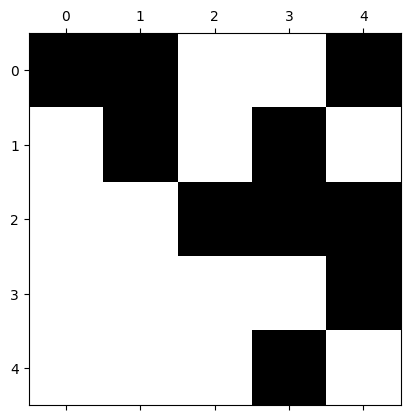

El primero es:  False


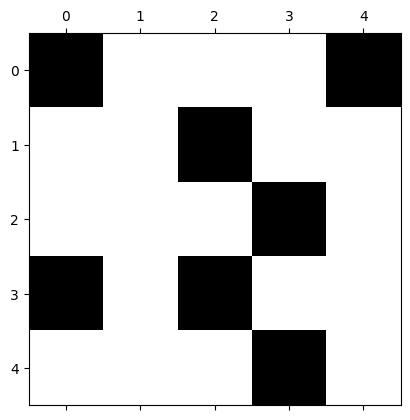

El segundo es:  True


In [26]:
k = 5 #Puede modificarse el tamaño de k

f_HC = randomkgen(k) #Un estado aleatorio de una matriz k^2
t_HC = GibbsHC(10000, k) #El estado final, un estado HC aleatorio de tamaño k^2

graphHC(f_HC)
print("El primero es: ", checkHC(f_HC))

graphHC(t_HC)
print("El segundo es: ", checkHC(t_HC))

### Animación

Finalmente vamos a visualizar entonces una muestra y algunos pasos de la trayectoría de la cadena de markov que condujo a la muestra.

In [27]:
rc('animation', html='html5') #Se necesita para ejecutar la animación en el notebook

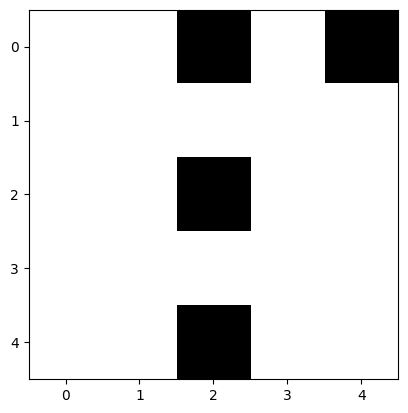

In [28]:
k=5 #Tamaño ajustable del tamaño de la matríz
res = randomkgen(k) #Generar el estado inicial
temporal = [] #Acá guardamos los frames de la animación

for i in range(10000):
  x,y = random.randint(0,k-1), random.randint(0,k-1) #Tomar vertice aleatoriamente

  if(toss_coin()): #Tirar la moneda
    if(checknei(res,x,y)): #Checar los vecinos
      res[x,y] = 1 #Si los vecinos no están pintados
    else:
      res[x,y] = 0 #Si hay almenos un vecino pintado
  else:
    res[x,y] = 0 #Si la moneda no cae en cara
  if i%500 == 0:
    temporal.append(copy.deepcopy(res)) #Guardamos frames solo cada 500, pues 10k imagenes es mucho

fig, ax = plt.subplots()
frames = []

for i in range(len(temporal)):

    img1 = ax.imshow(-1*temporal[i], cmap='gray', animated=True) #Pasamos de matríz a imagen
    frames.append([img1])

ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
ani.save('movie_example.mp4')


In [29]:
ani #Ejecutamos la animación

# 2. Valor tipico

En esta parte usamos el codigo del punto anterior para tratar de encontrar el valor tipico o esperado de el numero de particulas en las configuraciones factibles.

En esta simulacion, ejecutamos $n$ instancias de configuraciones factibles usando la implementacion anterior del *Gibbs Sampler*.


In [30]:
def histogram(n_simulations, k, n_gibs):
  x=0 #variables para calcular var y promedio
  xx=0
  start_time = time.time()
  bins = np.zeros(k**2 + 1, dtype=int) # array para las frecuencias

  for i in range(n_simulations):
    hard_core_sim = GibbsHC(n_gibs, k) # simulacion gibbs samples de un tablero K x K
    num_ones = np.count_nonzero(hard_core_sim == 1) # se cuentan la cantidad de 1s
    bins[num_ones] +=1
    x+=num_ones
    xx+=num_ones**2

  indexes = np.nonzero(bins)[0]
  bins = bins[bins != 0]

  pos = np.arange(len(indexes))
  ax = plt.axes()
  ax.set_xticks(pos)
  ax.set_xticklabels(indexes)

  plt.xlabel('Number particles')
  plt.ylabel('Frequency')
  plt.title(f'k={k}, Gibbs steps={n_gibs}, Simulations={n_simulations}')

  plt.bar(pos, bins, width=1, color='r', edgecolor='black')
  plt.show()
  print("Elapsed time:", time.time() - start_time, "seconds")
  mean=x/n_simulations
  print(f'Var={xx/n_simulations-mean**2}, mean={mean}')

Para el primer caso, se ejecutan 10000 instancias de una matriz $10 \times 10$ y deteniendo la simulacion en $X_{10000}$. En este caso se ve graficamente como el valor esperado está al rededor de 23, tambien se calculó la media muestral que es de $23.4$.

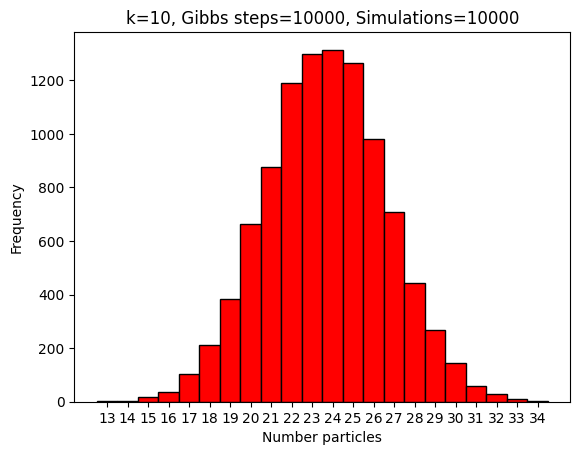

Elapsed time: 383.3878560066223 seconds
Var=8.591943749999928, mean=23.6675


In [31]:
histogram(10000, 10, 10000)

En el segundo caso se repitio en mismo procedimiento pero deteniendo la simulacion en $X_{100000}$, esta grafica es muy similar a la anterior aunque se ve un grado mayor de apuntamiento.

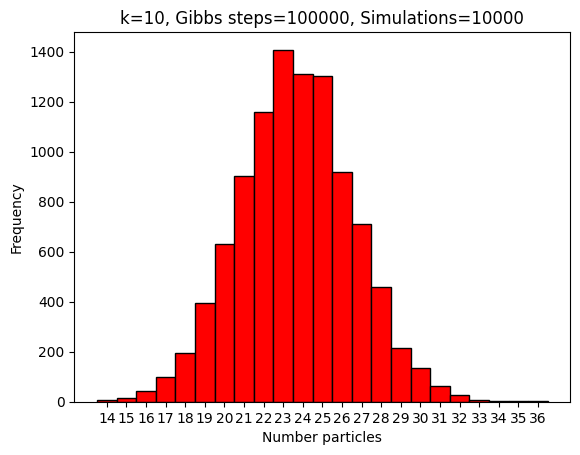

Elapsed time: 3807.1569097042084 seconds
Var=8.419809909999913, mean=23.6503


In [32]:
histogram(10000, 10, 100000)

# Algoritmo 2


El siguiente algoritmo va a colorear una matriz de $K \times K$ de modo que dos celdas adayacentes no tengan el mismo color. Dado que puede no existir un coloreo para un grafo (i.e usar 2 colores y el grafo no es bipartito), usaremos una cantidad de colores $q>n$ ($n$ maximo degree de un nodo), por tanto, por palomar el coloreo existe y al ser matriz usaremos $q>5$.

Primero creamos la funcion que nos dira que color vamos a poner en la celda $(x,y)$, donde $x$ es la fila y $y$ la columna.

In [33]:
q = 5
dx = [0,1,0,-1]
dy = [1,0,-1,0]


def get_color(x,y,mx):
  colors = []
  for i in range(q): #creamos lista con colores disponibles
    colors.append(i+1)
  for idx in range(4):
    nx = x + dx[idx]
    ny = y + dy[idx]
    if nx >= 0 and nx < k and ny >=0 and ny < k : #revisamos que la celda este los rangos permitidos
      if mx[nx][ny] > 0 and (colors.count(mx[nx][ny]) > 0): #revisamos que la celda adayacente tenga algun color
        colors.remove(mx[nx][ny])#quitamos los colores usados

  it = random.randint(0,len(colors)-1) #encontramos un color aleatorio
  return colors[it]


Una vez tenemos nuestro generador de color, debemos someter la matriz a $times$ (i.e $X_1,X_2,...,X_{times}$), donde vamos a imprimir las primeras $10$ iteraciones de la cadena de Markov.

In [34]:
def print_matrix(mx):
  for i in range(k):
    print(mx[i])


def q_coloring(times,k):

  for i in range(times):
    x,y = random.randint(0,k-1), random.randint(0,k-1) #generamos celda aleatoria
    if mx[x][y] == 0:
      mx[x][y] = get_color(x,y,mx)#asignamos color
    if i < 10:
      print("Interacion ",i)
      print_matrix(mx)


In [35]:
k = 5
mx = [[0 for _ in range(k)] for _ in range(k)]
q_coloring(100000,k)
print("Coloreo final: ")
print_matrix(mx)


Interacion  0
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
Interacion  1
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
Interacion  2
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
Interacion  3
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
Interacion  4
[0, 0, 0, 0, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
Interacion  5
[0, 0, 0, 0, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 0, 0]
Interacion  6
[0, 0, 0, 0, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 5, 0]
Interacion  7
[0, 0, 0, 5, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 0, 5, 0]
Interacion  8
[0, 0, 0, 5, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 3, 5, 0]
Interacion  9
[0, 2, 0, 5, 0]
[0, 5, 0, 0, 0]
[2, 0, 0, 0, 0]
[0, 0, 2, 0, 0]
[0, 0, 3, 5, 0]
Coloreo final: 
[5, 2, 4, 5, 3]
[1, 5, 1, 3, 5]
[2, 4, 5, 1,

Ajustando un poco el método de animación del primer algoritmo podemos realizar una animación de los primeros 50 pasos.

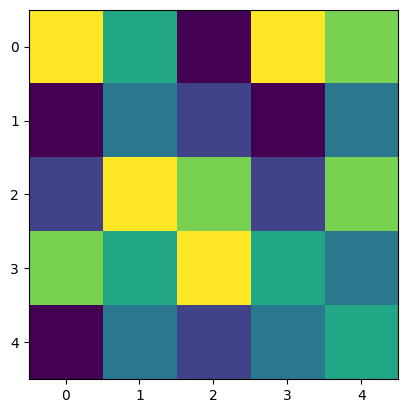

In [36]:
k=5 #Tamaño ajustable del tamaño de la matríz
mx = [[0 for _ in range(k)] for _ in range(k)] #Generar el estado inicial
temporal = [] #Acá guardamos los frames de la animación

for i in range(10000):
  x,y = random.randint(0,k-1), random.randint(0,k-1) #generamos celda aleatoria
  if mx[x][y] == 0:
    mx[x][y] = get_color(x,y,mx)#asignamos color
  if i<50:
    temporal.append(copy.deepcopy(mx)) #Guardamos frames solo cada 500, pues 10k imagenes es mucho

fig, ax = plt.subplots()
frames = []

for i in range(len(temporal)):

    img1 = ax.imshow(temporal[i], animated=True) #Pasamos de matríz a imagen
    frames.append([img1])

ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat_delay=1000)
ani.save('movie_example.mp4')

In [37]:
ani